## Train, Test or Retrain multiple models 

Best model saved at: logs/TRM_EEG_Model_v7_6/version_4/checkpoints/best-8358-val_acc=0.905.ckpt
  | Name         | Type                              | Params | Mode 
---------------------------------------------------------------------------
0 | loss_fn      | CrossEntropyLoss                  | 0      | train
1 | train_acc    | MulticlassAccuracy                | 0      | train
2 | val_acc      | MulticlassAccuracy                | 0      | train
3 | test_acc     | MulticlassAccuracy                | 0      | train
4 | test_cm      | MulticlassConfusionMatrix         | 0      | train
5 | encoder      | TCNModel_v1_outch64_GELU_head2_v7 | 43.3 K | train
6 | shared_net   | TRMSharedNet                      | 8.3 K  | train
7 | output_head  | Linear                            | 650    | train
8 | dropout      | Dropout                           | 0      | train
  | other params | n/a                               | 128    | n/a  
----------------------------------------------------------

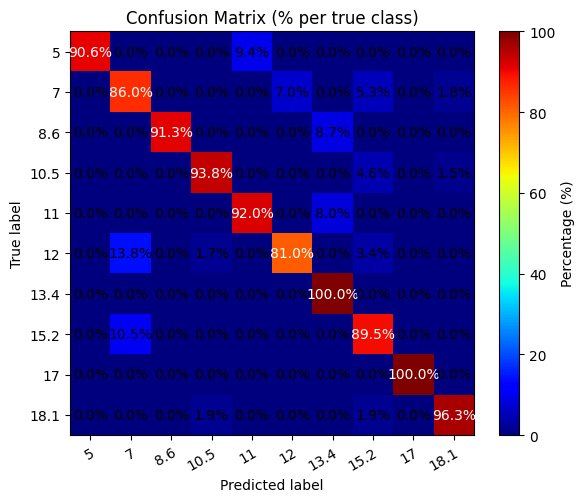

TRM_EEG_Model_v7_6: Test accuracy = 0.908

Plotting TRM_EEG_Model_v7_6: Test Accuracy = 0.908


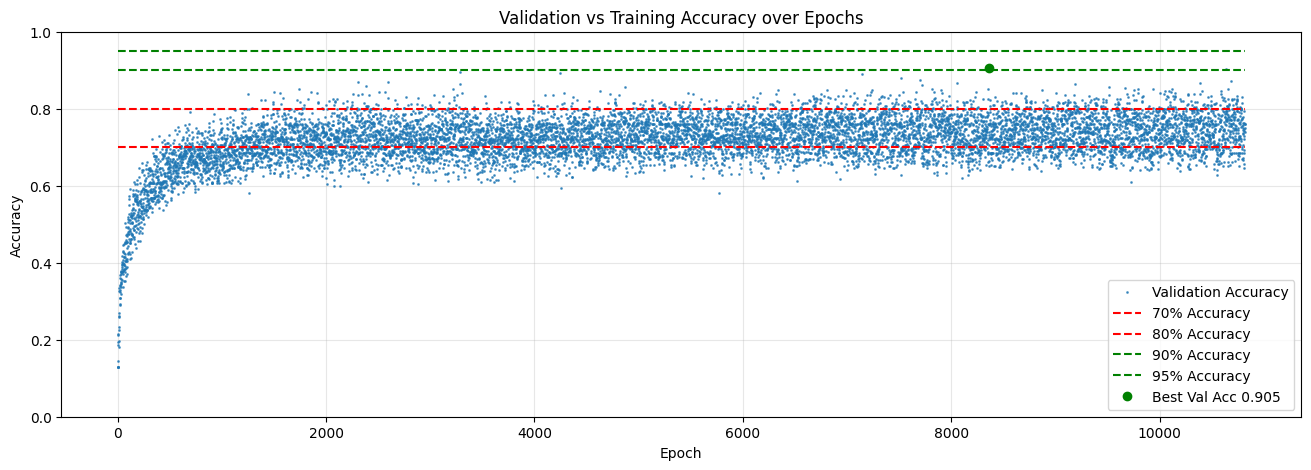


All models processed successfully!



In [1]:
from Model_Trainer import run_multiple_models
from  TRM import TRM_EEG_Model_v7_6
from Dataset_torch import EEGDataset_with_filters

models = [TRM_EEG_Model_v7_6,]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",   # no weights 
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz",   # weights 0.5
    "data_path": "datasets/numpy/ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz",  # no weights, lets try to retrain with weights on 4 and 8
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:02:00:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        # "num_classes": 4,
        # "class_labels": [10.5, 12, 15.2, 18.1],
        # "class_weights": [1.0, 1.0, 1.0, 1.0],
        
        # "num_classes": 5,
        # "class_labels": [0, 10.5, 12, 15.2, 18.1],
        # "class_weights": [0.5, 1.0, 1.0, 1.0, 1.0], 
        
        "num_classes": 10,
        "class_labels": [5, 7, 8.6, 10.5, 11, 12, 13.4, 15.2, 17, 18.1],
        "class_weights": [1.0, 1.0, 1.5, 1.0, 1.5, 1.0, 1.0, 1.0, 1.5, 1.0], 
    },
    
    # "skip_training": True,
    
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/checkpoints/best-11408-val_acc=0.948.ckpt", # best 4 label model before retraining
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_44_4_retrained_best/checkpoints/best-00-val_acc=0.953.ckpt",              # best 4 label model after retraining

    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_41_5_retrained_best/checkpoints/best-00-val_acc=0.813.ckpt", # best 5 label model
    
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_52_10_most_balanced_and_best/checkpoints/best-4880-val_acc=0.886.ckpt",   # most balanced and best label 10
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Train TRM on SSVEP

Loading data from: datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz
Data loaded: X=(1576, 8, 375), y=(1576,)
Dataset split: Train=1103, Val=236, Test=237
Dataloaders ready

Processing  TRM_EEG_Model_v7_6...

Training TRM_EEG_Model_v7_6...

  | Name         | Type                              | Params | Mode 
---------------------------------------------------------------------------
0 | loss_fn      | CrossEntropyLoss                  | 0      | train
1 | train_acc    | MulticlassAccuracy                | 0      | train
2 | val_acc      | MulticlassAccuracy                | 0      | train
3 | test_acc     | MulticlassAccuracy                | 0      | train
4 | test_cm      | MulticlassConfusionMatrix         | 0      | train
5 | encoder      | TCNModel_v1_outch64_GELU_head2_v7 | 43.3 K | train
6 | shared_net   | TRMSharedNet                      | 8.3 K  | train
7 | output_head  | Linear                            | 260    | train
8 | dropout      | Dropout

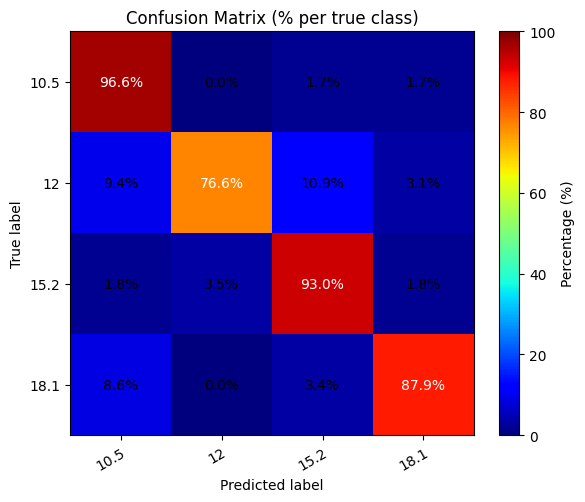

TRM_EEG_Model_v7_6: Test accuracy = 0.882

Plotting TRM_EEG_Model_v7_6: Test Accuracy = 0.882


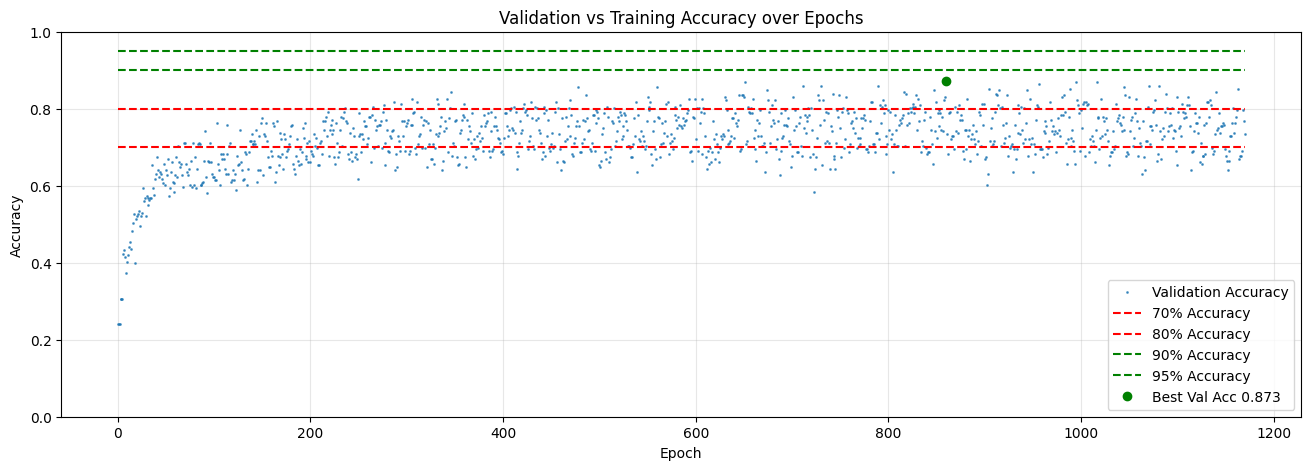


Processing  TCNModel_v1_outch64_GELU_head2...

Training TCNModel_v1_outch64_GELU_head2...

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 39.2 K | train
5 | head      | Sequential                | 4.5 K  | train
----------------------------------------------------------------
43.7 K    Trainable params
0         Non-trainable params
43.7 K    Total params
0.175     Total estimated model params size (MB)
22        Modules in train mode
0         Modules in eval mode
Best model saved at: logs/TCNModel_v1_outch64_GELU_head2/version_25/checkpoints/best-1728-val_acc=0.924.ckpt
  | Name      | Type                      | Params | Mode 
----

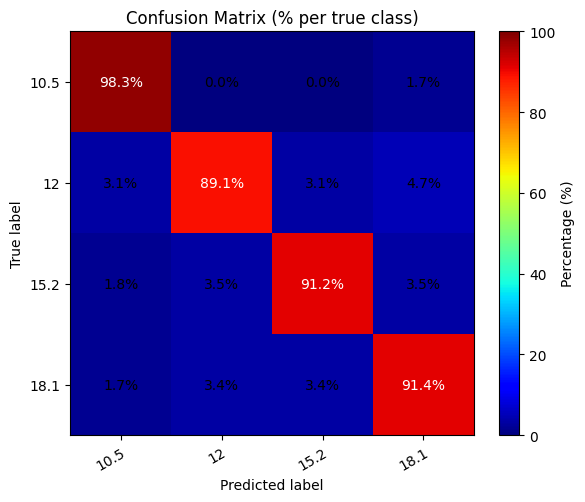

TCNModel_v1_outch64_GELU_head2: Test accuracy = 0.924

Plotting TRM_EEG_Model_v7_6: Test Accuracy = 0.924


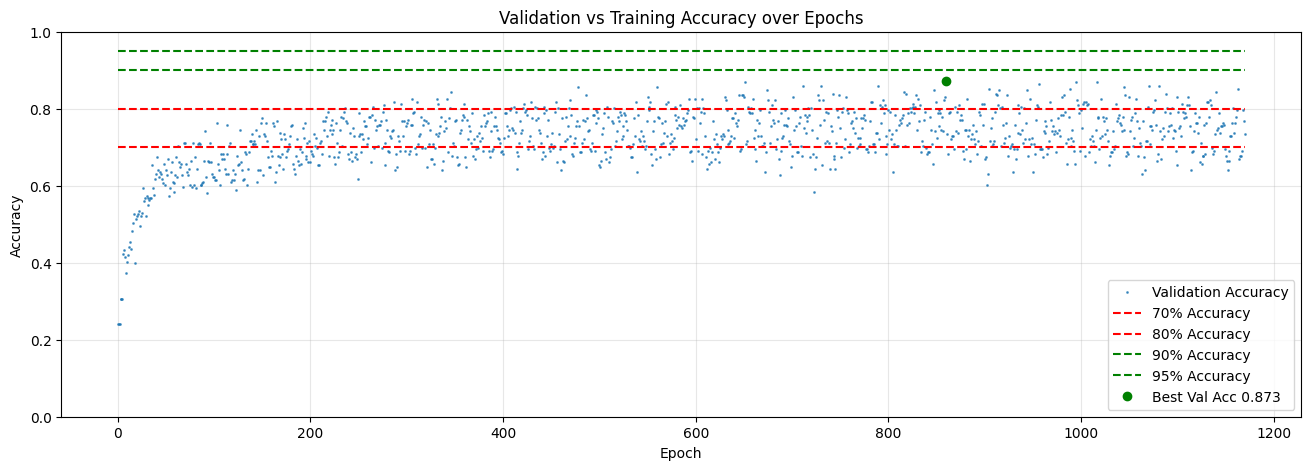


Plotting TCNModel_v1_outch64_GELU_head2: Test Accuracy = 0.924


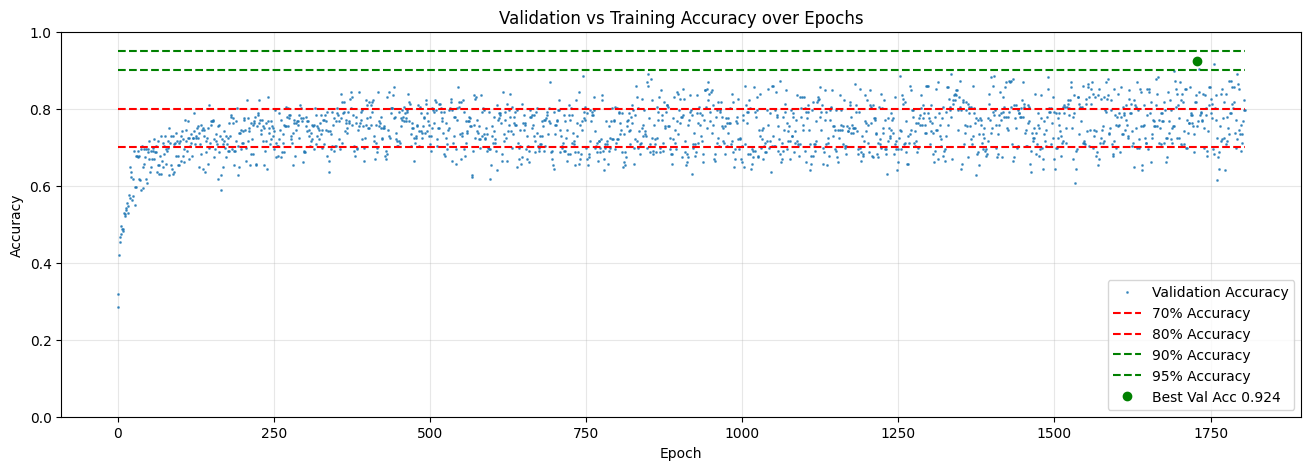


All models processed successfully!



In [1]:
from Model_Trainer import run_multiple_models
from Dataset_torch import EEGDataset_with_filters
from Models_1D import TCNModel_v1_outch64_GELU_head2
from TRM import (
    # TRM_EEG_Model_v1, TRM_EEG_Model_v1_2, TRM_EEG_Model_v1_3, TRM_EEG_Model_v1_4, TRM_EEG_Model_v1_5, TRM_EEG_Model_v1_6, 
    # TRM_EEG_Model_v3_1, 
    # TRM_EEG_Model_v3_2, 
    # TRM_EEG_Model_v3_3, TRM_EEG_Model_v3_4,
#  TRM_EEG_Model_v4_1,
    # TRM_EEG_Model_v5_1,
    # TRM_EEG_Model_v6_1,
    # TRM_EEG_Model_v7_1,
    TRM_EEG_Model_v7_2,
    # TRM_EEG_Model_v7_3,
    # TRM_EEG_Model_v7_4,
    # TRM_EEG_Model_v7_5,
    TRM_EEG_Model_v7_6,
    TRM_EEG_Model_v7_7,
    TRM_EEG_Model_v7_8,
)
models = [
        # TRM_EEG_Model_v1,
        # TRM_EEG_Model_v1_2,
        # TRM_EEG_Model_v1_3, #  0.903 / 0.873 very good and promising, lets hope
        # TRM_EEG_Model_v1_4, # ran out of memory twice 
        # TRM_EEG_Model_v1_5, # 0.890 / 0.873 not bad, same max val acc but actually quicker, test acc was lower at 0.890
        # TRM_EEG_Model_v3_1,   # 0.848 
        # TRM_EEG_Model_v1_6,   # 0.835  (might ve been the smaller shared net?)
        # TRM_EEG_Model_v4_1,     # 0.827
        # TRM_EEG_Model_v3_2,     #  0.911 / 0.856 for 10 min,
        # TRM_EEG_Model_v3_3,     # 0.856 / 0.873
        # TRM_EEG_Model_v3_4,    # nan
        # TRM_EEG_Model_v5_1,
        # TRM_EEG_Model_v6_1,     # 0.941 / 0.953 on 1h
        # TRM_EEG_Model_v7_1,     # 0.916 / 0.924 on 10 min   5x8=40  recursions holy moly 
        # TRM_EEG_Model_v7_2,       # 0.937 / 0.945 on 10 min   5x12=60 recursions holy holy moly
                                  # 0.945 / 0.958 on 1h meh :/
        # TRM_EEG_Model_v7_3,       # 0.928 / 0.924 on 10 min   7x12=84 recursions nice
        # TRM_EEG_Model_v7_4,       # 0.869 / 0.894 on 10 min   5x16=80 recursions
        # TRM_EEG_Model_v7_5,         # 0.890 / 0.898 on 10 min   
        TRM_EEG_Model_v7_6,         # 0.941 / 0.949 on 10 min
                                    # 0.945 / 0.958 on 1h 
        # TRM_EEG_Model_v7_7, # seemed pretty bad 
        # TRM_EEG_Model_v7_8,
        TCNModel_v1_outch64_GELU_head2, # baseline
]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",
    # "data_path": "datasets/numpy/new/ssvep_4labels_GGGG_nofilter_no01_250hz_1.5_window_size.npz", # 0.916 what>?
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:10:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
    },
    "SUMMARY": True,
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v1/version_9_4ssvep_945/checkpoints/best-2491-val_acc=0.953.ckpt",  
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v1_4/version_2/checkpoints/best-36-val_acc=0.517.ckpt",  
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v1_3/version_2_4ssvep_903_10min/checkpoints/best-920-val_acc=0.873.ckpt",  
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v3_2/version_1/checkpoints/best-4998-val_acc=0.945.ckpt",  
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v7_2/version_1/checkpoints/best-1542-val_acc=0.945.ckpt",
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v7_2/version_2/checkpoints/best-10005-val_acc=0.958.ckpt", 
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v7_6/version_1/checkpoints/best-4254-val_acc=0.958.ckpt", 
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v7_6/version_3_987/checkpoints/best-8105-val_acc=0.970.ckpt", 
    
       
    
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Train TRM on Motor Imagery: left vs right fist

In [ ]:

from Model_Trainer import run_multiple_models
from Dataset_torch import EEGDataset_with_filters_EDF_Stream
from TRM import (
    TRM_EEG_Model_v1, TRM_EEG_Model_v6_1, TRM_EEG_Model_v7_6, 
    TRM_EEG_Model_v7_6_physionet, TRM_EEG_Model_v7_6_physionet_v2, TRM_EEG_Model_v7_6_physionet_v3,
    TRM_EEG_Model_v7_6_physionet_v4,TRM_EEG_Model_v7_6_physionet_v5,
    TRM_EEG_Model_v7_6_physionet_v7,
    TRM_EEG_Model_v7_6_physionet_v9,
    TRM_EEG_Model_v7_6_physionet_v7_1,
)

models = [
    # TRM_EEG_Model_v1,
    # TRM_EEG_Model_v2,
    # TRM_EEG_Model_v6_1,
    # TRM_EEG_Model_v7_6,
    # TRM_EEG_Model_v7_6_physionet,
    # TRM_EEG_Model_v7_6_physionet_v2,
    # TRM_EEG_Model_v7_6_physionet_v3,
    # TRM_EEG_Model_v7_6_physionet_v4,     # 0.767 / 0.816 
    # TRM_EEG_Model_v7_6_physionet_v5,       # i stopped it at 0.775 val acc 
    # TRM_EEG_Model_v7_6_physionet_v7,   # 2h  0.786 / 0.801
    TRM_EEG_Model_v7_6_physionet_v7_1,
    # TRM_EEG_Model_v7_6_physionet_v9,
]

shared_parameters_ssvep = {  
    "data_path": "/home/gtenzing/skyforge/ml_bci/week_4/dataset/files",
    "SUBJECTS": [s for s in range(1, 109) if s not in [38, 88, 89, 92, 100, 104]],
    "SAMPLE_RATE": 160,
    "RUNS": [4, 8, 12],
    "CLASSES": ["T1", "T2"],
    
    "DATASET_CLASS": EEGDataset_with_filters_EDF_Stream,
    "TRAIN_SPLIT": 0.7,
    "VAL_SPLIT": 0.20,
    "TEST_SPLIT": 0.10,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 64, #64 for 10 sec, 32  in 14 sec, 16 in 22 sec, 
    "NUM_WORKERS": 11,
    "PREFETCH_FACTOR": 1,
    
    "MAX_TIME": "00:01:00:00",
    # "EPOCHS": 1,
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 2,
        "class_labels": ["left_fist", "right_fist"],
    },
    
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v1/version_3_immv2_769/checkpoints/best-28-val_acc=0.761.ckpt",    # 1h
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v1/version_7_immv2_804_v1/checkpoints/best-21-val_acc=0.796.ckpt",    # 15min 
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v7_6_physionet_v4/version_0/checkpoints/best-180-val_acc=0.816.ckpt",  # unkown period prbl 1h
}    
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)


## Train TRM on Bci iv 2b 

In [ ]:
import mne

raw = mne.io.read_raw_gdf("datasets/BCICIV_2b/B0101T.gdf", preload=False)
# # print(raw)
# descriptions = [a['description'] for a in raw.annotations]
# print("All annotation descriptions:", sorted(set(descriptions)))

# print("--------")
# events, event_id = mne.events_from_annotations(raw)
# print("event_id mapping:")
# print(event_id)

# print("--------")
# for ann in raw.annotations:
#     print(f"Onset: {ann['onset']:.2f}s, desc: {ann['description']}, duration: {ann['duration']}")

# raw = mne.io.read_raw_gdf(path, preload=False)
print(raw.ch_names)

In [ ]:

from Model_Trainer import run_multiple_models
from Dataset_torch import EEGDataset_with_filters_GDF_Stream
from Models_1D import TCNModel_v1_outch64_GELU_head2
from TRM import TRM_EEG_Model_v7_6
models = [
    TCNModel_v1_outch64_GELU_head2,
    TRM_EEG_Model_v7_6,
]

shared_parameters_ssvep = {  
    "data_path": "datasets/BCICIV_2b",
    "SUBJECTS": [1,2,3,4,5,6,7,8,9],
    "SAMPLE_RATE": 250,
    "RUNS": [1, 2, 3, 4, 5],
    "CLASSES": ["T1", "T2"],
    
    "DATASET_CLASS": EEGDataset_with_filters_GDF_Stream,
    "TRAIN_SPLIT": 0.7,
    "VAL_SPLIT": 0.20,
    "TEST_SPLIT": 0.10,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": [0, 1, 2], 
    "BATCH_SIZE": 32,
    "NUM_WORKERS": 11,
    "PREFETCH_FACTOR": 1,
    
    "MAX_TIME": "00:00:10:00",
    "MODEL_KWARGS": {
        "in_channels": 3, 
        "num_classes": 2,
        "class_labels": ["left-hand", "right-hand"],
    },
    
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_outch64_GELU_head2/version_000000/checkpoints/best-00000-val_acc=0.00000000.ckpt",
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v7_6/version_000000/checkpoints/best-00000-val_acc=0.00000000.ckpt",
    
}    
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)


## Train TRM on Motor Imagery: left fist vs right fist vs both fists vs both feet

In [ ]:
from Model_Trainer import run_multiple_models
from Dataset_torch import EEGDataset_with_filters_EDF_Stream
from TRM import TRM_EEG_Model_v1, TRM_EEG_Model_v2
models = [
    TRM_EEG_Model_v1,
    # TRM_EEG_Model_v2,
]

shared_parameters_ssvep = {  
    "data_path": "/home/gtenzing/skyforge/ml_bci/week_4/dataset/files",
    "SUBJECTS": [s for s in range(1, 109) if s not in [38, 88, 89, 92, 100, 104]],
    "SAMPLE_RATE": 160,
    "RUNS": [4, 6, 8, 10, 12, 14], # Task 2 and 4 to get imagine opening and closing left or right fist AND both fists and both feet
    "CLASSES": ["T1", "T2"],
    
    "DATASET_CLASS": EEGDataset_with_filters_EDF_Stream,
    "TRAIN_SPLIT": 0.7,
    "VAL_SPLIT": 0.20,
    "TEST_SPLIT": 0.10,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 32,
    "NUM_WORKERS": 11,
    "PREFETCH_FACTOR": 1,
    
    "MAX_TIME": "00:01:00:00",
    # "EPOCHS": 1,
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 2,
        "class_labels": ["left_fist", "right_fist"],
    },
    
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v1/version_3_immv2_769/checkpoints/best-28-val_acc=0.761.ckpt",    # 1h
    # "LOAD_CHECKPOINT": "logs/TRM_EEG_Model_v1/version_7_immv2_804_v1/checkpoints/best-21-val_acc=0.796.ckpt",    # 15min 
}    
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)


## Train TCN Variants

In [ ]:
from Model_Trainer import run_multiple_models
from Utils import plot_all_results
from  Models_1D import TCNModel_withBase
from Dataset_torch import EEGDataset_with_filters
# models = [TCNModel_withBase,]

from Random_models import (
                          #  TCNModel_v0, TCNModel_v1, 
                          #  TCNModel_v1_d16, TCNModel_v1_d32, TCNModel_v1_d_repeat, TCNModel_v1_d_aggressive,
                          #  TCNModel_v1_k4, TCNModel_v1_k5,
                          #  TCNModel_v1_SiLU, TCNModel_v1_LeakyReLU, TCNModel_v1_ELU, TCNModel_v1_GELU,
                          #  TCNModel_v1_outch64_GELU, TCNModel_v1_outch128_GELU,
                          #  TCNModel_d32_outch64_GELU, TCNModel_d32_outch128_GELU,
                          # TCNModel_v1_outch64_LeakyReLU,
                          # TCNModel_v1_outch64_ReLU,
                          # TCNModel_d32_outch64_LeakyReLU,
                          # TCNModel_d32_outch64_ReLU,
                          
                          # TCNModel_v1_outch64_GELU_d_repeated,
                          # TCNModel_v1_outch64_GELU_head1,
                          TCNModel_v1_outch64_GELU_head2,
                          TCNModel_v1_outch64_GELU_head2_small,
                          TCNModel_v1_outch64_GELU_head2_smallest,
                          TCNModel_v1_outch64_GELU_head2_smallest_extreme,

                          # TCNModel_v1_outch64_GELU_pool1,
                          # TCNModel_v1_outch64_GELU_pool2,
                          # TCNModel_v1_outch64_GELU_pool3,
                          # TCNModel_v1_outch64_GELU_head2_pool1,
                          # TCNModel_v1_outch64_GELU_head2_pool2,
                          )

# list of TCN model variants for experimentation
models = [
        #   TCNModel_v0, 
          # TCNModel_v1, 
          
        #   TCNModel_v1_d16, 
        #  TCNModel_v1_d32, 
          # TCNModel_v1_d_repeat, TCNModel_v1_d_aggressive,
          # TCNModel_v1_k4, TCNModel_v1_k5,
          # TCNModel_v1_SiLU, TCNModel_v1_LeakyReLU, TCNModel_v1_ELU, TCNModel_v1_GELU,
          # TCNModel_v1_outch64, 
          # TCNModel_v1_outch128,
          # TCNModel_d32_outch64,
          # TCNModel_d32_outch128,
            # TCNModel_v1_outch64_LeakyReLU,
          # TCNModel_v1_outch64_ReLU,
            # TCNModel_d32_outch64_LeakyReLU,
          # TCNModel_d32_outch64_ReLU,
          
          # TCNModel_v1_outch64_GELU_d_repeated,
          # TCNModel_v1_outch64_GELU_head1,
          # TCNModel_v1_outch64_GELU_head2,
          # TCNModel_v1_outch64_GELU_head2_small,
          # TCNModel_v1_outch64_GELU_head2_smallest,
          TCNModel_v1_outch64_GELU_head2_smallest_extreme,
          
          
          # TCNModel_v1_outch64_GELU_head2_pool1,
          # TCNModel_v1_outch64_GELU_head2_pool2,

          # TCNModel_v1_outch64_GELU_pool1,
          # TCNModel_v1_outch64_GELU_pool2,
          # TCNModel_v1_outch64_GELU_pool3,
]


shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:01:00:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
    },
    "SUMMARY": True,
    "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_d32/version_2_932/checkpoints/best-1807-val_acc=0.898.ckpt",              # best 4 label model after retraining
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_outch64_GELU_head2/version_3_958_1h/checkpoints/best-9708-val_acc=0.975.ckpt",    # 1h 
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_outch64_GELU_head2_small/version_0_4_954_1h/checkpoints/best-10840-val_acc=0.953.ckpt",    # 1h 
    "LOAD_CHECKPOINT": "logs/TCNModel_v1_outch64_GELU_head2_smallest/version_0_4_928_1h/checkpoints/best-12358-val_acc=0.928.ckpt",    # 1h 
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Training on the side 

In [ ]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
from Dataset_torch import EEGDataset_with_filters
from  Models_1D import TCNModel_withBase, EEGClassifier, MNISTNet, EEGNet
from Random_models import (
                          TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D,
                          TCNModel_withBase_v3_DepthwiseSeparableConv1D,
                          TCNModel_withBase_v2_ResidualTCNBlock,
                          EEGTransformerLite_withBase,
                            TCNAttentionModel_withBase,
                            SpectroCNN_withBase,
                            EEGTransformer_withBase,
                            ShallowConvNet_withBase,
                            BiLSTMModel_withBase,
                          )


models = [
        # EEGClassifier, 
        # MNISTNet, 
        # EEGNet, # error matmul shapes
        
        TCNModel_withBase_v4_DepthwiseSeparableConv1D_SEBlock1D,
        TCNModel_withBase_v3_DepthwiseSeparableConv1D,
        TCNModel_withBase_v2_ResidualTCNBlock,
        
        EEGTransformerLite_withBase,
        TCNAttentionModel_withBase,
        SpectroCNN_withBase,
        EEGTransformer_withBase,
        ShallowConvNet_withBase,
        BiLSTMModel_withBase,
]


shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:00:10",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
    },
  
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "",             
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
from Model_Trainer import run_multiple_models
from Dataset_torch import EEGDataset_with_filters
from Models_1D import TCNModel_withBase
from Random_models import TCNModel_v1_outch64_GELU_head2

models = [
    TCNModel_v1_outch64_GELU_head2, 
]

shared_parameters_ssvep = { 
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz",   
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:01:00:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 5,
        "class_labels": [0, 10.5, 12.0, 15.2, 18.1],
        "class_weights": [0.5, 1.0, 1.0, 1.0, 1.0], 
    },
    
    # "skip_training": True, 
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_54_5_retrained_best/checkpoints/best-11473-val_acc=0.865.ckpt"
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Training on PhysioNet data (imaginary motor movement)

In [ ]:

from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
import Models_1D
from Dataset_torch import EEGDataset_with_filters

models = [
    Models_1D.TCNModel_withBase, 
]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz",  # about 10 subjects  
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 256,
    "NUM_WORKERS": 4,
    "PREFETCH_FACTOR": 2,
    
    "MAX_TIME": "00:00:30:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 3,
        "class_labels": ["relaxed", "left_fist", "right_fist"],
        "class_weights": [1.0, 1.3, 1.3],
    },
    
    "skip_training": True,
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_56_fist/checkpoints/best-153-val_acc=0.586.ckpt", 
}  
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Training on PhysioNet data (imaginary motor movement) with new Dataset class 3 class labels

In [ ]:
from Model_Trainer import run_multiple_models
from Models_1D import TCNModel_v1_outch64_GELU_head2
from Dataset_torch import EEGDataset_with_filters_EDF_Stream

models = [TCNModel_v1_outch64_GELU_head2,]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz",  
    "data_path": "/home/gtenzing/skyforge/ml_bci/week_4/dataset/files",
    "SUBJECTS": [s for s in range(1, 109) if s not in [38, 88, 89, 92, 100, 104]],
    "SAMPLE_RATE": 160,
    
    "DATASET_CLASS": EEGDataset_with_filters_EDF_Stream,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 32,
    "NUM_WORKERS": 11,
    "PREFETCH_FACTOR": 1,
    
    "MAX_TIME": "00:00:30:00",
    # "EPOCHS": 3,
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 3,
        "class_labels": ["relaxed", "left_fist", "right_fist"],
        "class_weights": [1.0, 1.3, 1.3],
    },
    
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_56_fist/checkpoints/best-153-val_acc=0.586.ckpt", 
}  
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Training on PhysioNet data (imaginary motor movement) with new Dataset class, 2 classes binary

In [ ]:
from Model_Trainer import run_multiple_models
from Models_1D import TCNModel_v1_outch64_GELU_head2
from Dataset_torch import EEGDataset_with_filters_EDF_Stream

models = [TCNModel_v1_outch64_GELU_head2,]

shared_parameters_ssvep = {  
    "data_path": "/home/gtenzing/skyforge/ml_bci/week_4/dataset/files",
    "SUBJECTS": [s for s in range(1, 109) if s not in [38, 88, 89, 92, 100, 104]],
    "SAMPLE_RATE": 160,
    "RUNS": [4, 8, 12],
    # "CLASSES": ["T1", "T2"],
    
    "DATASET_CLASS": EEGDataset_with_filters_EDF_Stream,
    # "TRAIN_SPLIT": 0.7,
    # "VAL_SPLIT": 0.20,
    # "TEST_SPLIT": 0.10,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 32,
    "NUM_WORKERS": 11,
    "PREFETCH_FACTOR": 1,
    
    "MAX_TIME": "00:00:01:00",
    # "EPOCHS": 1,
    "MODEL_KWARGS": {
        "in_channels": 64, 
        # "num_classes": 3,
        # "class_labels": ["relaxed", "left_fist", "right_fist"],
        # "class_weights": [1.0, 1.3, 1.3],
        "num_classes": 2,
        "class_labels": ["left_fist", "right_fist"],
    },
    
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_56_fist/checkpoints/best-153-val_acc=0.586.ckpt", 
}  
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Trying Melspetrogram with 2D CNN

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Dataset_torch import EEGDataset, EEGDataset_mel, EEGDataset_mel_with_filters
from Utils import plot_all_results
import Models_2D

models = [
    # Models_2D.EEGClassifier_mel,             # 0.69 on 2mins, 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_with_res,    # 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_small,       # 0.70 on 2mins
    Models_2D.EEGNet_for_mel
]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy_testing/ssvep_5_filter.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no0.npz",
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz",
    
    "DATASET_CLASS" : EEGDataset_mel_with_filters,
    
    "NOTCH_50": True,
    "OCCIPITAL_SLICE": slice(0, 8), 
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 4,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,   
        "class_labels": [10.5, 12, 15.2, 18.1],
    }
}

results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Training on eyes open closed data

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Utils import plot_all_results
from Dataset_torch import EEGDataset_with_filters
import Models_1D
import Random_models

models_ = [
    Models_1D.EEGClassifier,  # with notch on 2mins: 0., test: 0., on 15mins: 0. test: 0.
    ]

models = [
    Random_models.TCNModel_withBase,           # with notch on 2mins: 0.806, test: 0., on 15mins: 0.
]

shared_parameters_eyes = {
    # "data_path": "datasets/numpy/eyes_filter.npz",
    "data_path": "datasets/numpy/processed_eeg_data_eyes.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 256,
    
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 2,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,  
        "class_labels": [0, 1],
    }
}
results, test_loader = run_multiple_models(models, shared_parameters_eyes)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Plot any saved model 

In [ ]:
from Utils import plot_training_metrics

csv_path = "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/metrics.csv"
plot_training_metrics(csv_path)